In [99]:
path="c:\\pytest\\"
import rhinoMorph

In [100]:
def read_data(filename, encoding='cp949', header=False):
    with open(filename, 'r', encoding=encoding) as f:
        data = [line.split('\t') for line in f.read().splitlines()]
        if not header:
            data = data[1:]
    return data

def write_data(data, filename, encoding='cp949'):
    with open(filename, 'w', encoding=encoding) as f:
        f.write(data)

data = read_data(path+'ratings_morphed.txt')
print(len(data))
print(len(data[0]))
print(data[0])

197559
3
['8132799', '디자인 배우 학생 외국 디자이너 일구 전통 통하 발전 문화 산업 부럽 사실 우리나라 그 어렵 시절 끝 열정 지키 노라노 같 전통 있 같 사람 꿈 꾸 이루 나가 있 감사', '1']


In [101]:
data_text= [line[1] for line in data]
data_senti= [line[2] for line in data]

from sklearn.model_selection import train_test_split
train_data_text, test_data_text, train_data_senti, test_data_senti = train_test_split(data_text, data_senti, stratify=data_senti)

In [102]:
from collections import Counter
train_data_senti_freq = Counter(train_data_senti)
print(f"train_data_senti_freq: {train_data_senti_freq}")

test_data_senti_freq = Counter(test_data_senti)
print(f"test_data_senti_freq: {test_data_senti_freq}")

train_data_senti_freq: Counter({'1': 74115, '0': 74054})
test_data_senti_freq: Counter({'1': 24705, '0': 24685})


In [103]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(min_df=5).fit(train_data_text) #5를 쓰는 이유 단어를 10k~30k사이로 뽑아 열을 만들기 위해, 보통 사람들은 약 10k단어를 주로 쓴다.(한나라의 단어량은 보통 300k)
X_train = vect.transform(train_data_text)
print(f"X_train: {repr(X_train)}")

X_train: <148169x11729 sparse matrix of type '<class 'numpy.int64'>'
	with 827935 stored elements in Compressed Sparse Row format>


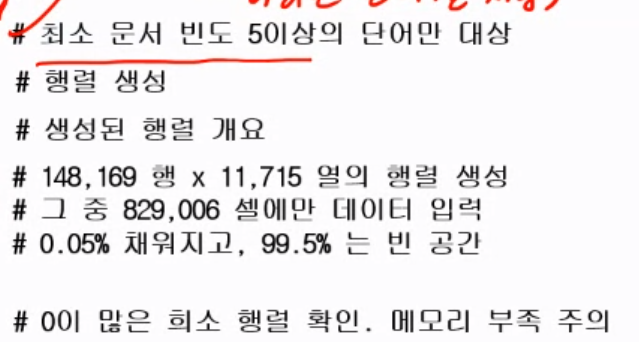

In [104]:
feature_names = vect.get_feature_names()
print(f"특성개수: {len(feature_names)}")
print(f"처음 20개 특성: {feature_names[:20]}")
print(f"3000~5000까지의 특성: {feature_names[3000:3100]}")

특성개수: 11729
처음 20개 특성: ['10점', '1빠', 'cgv', 'ebs', 'jtbc', 'kbs', 'la', 'mb', 'mbc', 'naver', 'ok', 'sbs', 'sns', 'tv', 'usb', 'ㄱㅅ', 'ㄴㄴ', 'ㄷㄷ', 'ㅂㄷㅂㄷ', 'ㅂㅅ']
3000~5000까지의 특성: ['리사', '리스', '리스크', '리스트', '리슨', '리안', '리암', '리언', '리얼', '리얼리즘', '리얼리티', '리오', '리오타', '리우', '리즈', '리차드', '리처드', '리치', '리콜', '리키', '리턴', '리틀', '리포트', '리플', '리플리', '리허설', '린다', '린이', '린제이', '린지', '린치', '릴리', '립스틱', '링컨', '링크', '마가', '마가렛', '마감', '마고', '마구', '마구잡이', '마귀', '마나', '마냥', '마네', '마네킹', '마녀', '마녀사냥', '마누라', '마니아', '마담', '마당', '마더', '마돈나', '마동석', '마디', '마땅', '마라도나', '마라톤', '마력', '마련', '마루', '마르', '마른', '마리', '마리아', '마리옹', '마린', '마릴린', '마마', '마모루', '마무리', '마미', '마법', '마법사', '마블', '마비', '마사', '마사미', '마샬', '마성', '마수리', '마술', '마술사', '마스', '마스크', '마스터', '마시', '마약', '마왕', '마우스', '마을', '마음', '마음껏', '마음대로', '마음속', '마음씨', '마의', '마이', '마이너']


c:\projects\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [105]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
y_train=pd.Series(train_data_senti)
lr = LogisticRegression(solver='liblinear')
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
# solver 'lbfgs' 'newton-cg', 'saga' or 'liblinear', ...
lr.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [106]:
X_test = vect.transform(test_data_text)
y_test = pd.Series(test_data_senti)
print(f"테스트 데이터 점수: {lr.score(X_test, y_test)}")

테스트 데이터 점수: 0.811237092528852


In [107]:
import rhinoMorph
rn = rhinoMorph.startRhino()
text = "즐거운 하루!"
morph_list = rhinoMorph.onlyMorph_list(rn, text, pos=['NNG', 'NNP', 'VV', 'VA', 'XR', 'IC', 'MM', 'MAG', 'MAJ'])
morph_list = [' '.join(morph_list)]
print(morph_list)

filepath:  c:\projects\venv\lib\site-packages
classpath:  c:\projects\venv\lib\site-packages\rhinoMorph/lib/rhino.jar
JVM is already started~
RHINO started!
['즐겁 하루']


In [108]:
X_input = vect.transform(morph_list)
result = lr.predict(X_input)
if result=="0":
    print("부정적인 글입니다.")
else:
    print("긍정적인 글입니다.")

긍정적인 글입니다.


In [109]:
path
path1 = "C:\\projects\\220926 연습문제 데이터\\"

In [110]:
import pandas as pd
대화라벨링 = pd.read_excel(path1+"감정대화라벨링말뭉치_3600.xlsx")
대화라벨링

,사람문장1,결과
0,요즘 부모님과 많이 부딪혀.,-1.0
1,엄마가 결국 집을 나갔어. 너무 너무 슬퍼.,-1.0
2,학교에서 한 친구를 괴롭히는 무리에게 그만하라고 했어.,-1.0
3,이번에 팀장님이 간단한 조사 업무를 부탁하셨는데 내가 잘못 처리했어. 너무 절망적이야.,-1.0
4,남편이 이혼할 때 위자료를 주지 않으려고 변호사를 고용했어.,-1.0
...,...,...
3593,나도 사람들과 어울리고 싶은데 자꾸만 겉돌게 돼.,-1.0
3594,취업 준비를 해야 하는데 무엇부터 해야 할지 모르겠어.,-1.0
3595,동생이 내 차를 몰래 가지고 나갔다가 사고를 냈어. 내 허락도 없이 몰래 일을 저질...,-1.0
3596,눈이 나빠져서 병원에 갔더니 백내장이 있고 눈에 뭔가 이상이 있다고 해.,-1.0


In [111]:
대화라벨링.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3598 entries, 0 to 3597
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   사람문장1   3598 non-null   object 
 1   결과      3597 non-null   float64
dtypes: float64(1), object(1)
memory usage: 56.3+ KB


In [112]:
대화라벨링.결과.unique()

array([-1.,  1.,  0., nan])

In [113]:
대화라벨링=대화라벨링[(대화라벨링.결과==-1) | (대화라벨링.결과==1)]

In [114]:
대화라벨링.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3189 entries, 0 to 3597
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   사람문장1   3189 non-null   object 
 1   결과      3189 non-null   float64
dtypes: float64(1), object(1)
memory usage: 74.7+ KB


In [115]:
대화라벨링.결과.unique()

array([-1.,  1.])

In [116]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(대화라벨링.사람문장1, 대화라벨링.결과, stratify=대화라벨링.결과, random_state=1111)

In [117]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(min_df=2).fit(X_train) # 1:7490 2:2248
X_train_ = vect.transform(X_train)
X_test_ = vect.transform(X_test)
repr(X_train_)

"<2391x2245 sparse matrix of type '<class 'numpy.int64'>'\n\twith 14264 stored elements in Compressed Sparse Row format>"

In [118]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='liblinear', random_state=1111)
lr.fit(X_train_, pd.Series(y_train))
predict = lr.predict(X_test_)
lr.score(X_test_, y_test)

0.8822055137844611

In [119]:
from sklearn.ensemble import RandomForestRegressor
rr = RandomForestRegressor(n_estimators=120)
rr.fit(X_train_, pd.Series(y_train))
predict = rr.predict(X_test_)
rr.score(X_test_, y_test)

0.11385557016533532

In [123]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import StratifiedKFold
str_kf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 1111)
score = []
for train_index, test_index in str_kf.split(X_train, y_train):
    X_train_fold, X_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]
    # vect = CountVectorizer(min_df=2).fit(X_train) # 1:7490 2:2248
    X_train_fold_vect = vect.transform(X_train_fold)
    X_test_fold_vect = vect.transform(X_test_fold)
    print(repr(X_train_fold_vect))
    lr = LogisticRegression(solver='liblinear', random_state=1111)
    lr.fit(X_train_fold_vect, pd.Series(y_train_fold))
    predict = lr.predict(X_test_fold_vect)
    print(lr.score(X_test_fold_vect, y_test_fold))
    score.append(lr.score(X_test_fold_vect, y_test_fold))
print(f"평균 정확도: {sum(score)/len(score)}")

<1912x2245 sparse matrix of type '<class 'numpy.int64'>'
	with 11343 stored elements in Compressed Sparse Row format>
0.8914405010438413
<1913x2245 sparse matrix of type '<class 'numpy.int64'>'
	with 11454 stored elements in Compressed Sparse Row format>
0.9037656903765691
<1913x2245 sparse matrix of type '<class 'numpy.int64'>'
	with 11376 stored elements in Compressed Sparse Row format>
0.9079497907949791
<1913x2245 sparse matrix of type '<class 'numpy.int64'>'
	with 11434 stored elements in Compressed Sparse Row format>
0.8891213389121339
<1913x2245 sparse matrix of type '<class 'numpy.int64'>'
	with 11449 stored elements in Compressed Sparse Row format>
0.8891213389121339
평균 정확도: 0.8962797320079314


In [ ]:
# import pickle
# from sklearn.utils import all_estimators
# all = all_estimators(type_filter='regressor')
# for i in all:
#     print(i)

# with open('regressor.pickle', 'wb') as f:
#     pickle.dump(all, f, pickle.HIGHEST_PROTOCOL)

In [140]:
import pickle
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import StratifiedKFold

all_es = dict()
with open('regressor.pickle', 'rb') as f:
    all = pickle.load(f)
for (name, estimator) in all:
    print(estimator)
    str_kf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 1111)
    score = []
    for train_index, test_index in str_kf.split(X_train, y_train):
        X_train_fold, X_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
        y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]
        # vect = CountVectorizer(min_df=2).fit(X_train) # 1:7490 2:2248
        X_train_fold_vect = vect.transform(X_train_fold)
        X_test_fold_vect = vect.transform(X_test_fold)
        print(repr(X_train_fold_vect))
        lr = estimator()
        try:
            lr.fit(X_train_fold_vect, pd.Series(y_train_fold))
            predict = lr.predict(X_test_fold_vect)
            print(lr.score(X_test_fold_vect, y_test_fold))
            score.append(lr.score(X_test_fold_vect, y_test_fold))
        except:
            pass
    try:
        print(f"평균 정확도: {sum(score)/len(score)}")
        all_es[name]= sum(score)/len(score)
    except:
        pass

<class 'sklearn.linear_model._bayes.ARDRegression'>
<1912x2245 sparse matrix of type '<class 'numpy.int64'>'
	with 11343 stored elements in Compressed Sparse Row format>
<1913x2245 sparse matrix of type '<class 'numpy.int64'>'
	with 11454 stored elements in Compressed Sparse Row format>
<1913x2245 sparse matrix of type '<class 'numpy.int64'>'
	with 11376 stored elements in Compressed Sparse Row format>
<1913x2245 sparse matrix of type '<class 'numpy.int64'>'
	with 11434 stored elements in Compressed Sparse Row format>
<1913x2245 sparse matrix of type '<class 'numpy.int64'>'
	with 11449 stored elements in Compressed Sparse Row format>
<class 'sklearn.ensemble._weight_boosting.AdaBoostRegressor'>
<1912x2245 sparse matrix of type '<class 'numpy.int64'>'
	with 11343 stored elements in Compressed Sparse Row format>
0.10355133552182882
<1913x2245 sparse matrix of type '<class 'numpy.int64'>'
	with 11454 stored elements in Compressed Sparse Row format>
0.20069312728540245
<1913x2245 sparse ma

c:\projects\venv\lib\site-packages\sklearn\linear_model\_huber.py:332: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\projects\venv\lib\site-packages\sklearn\linear_model\_huber.py:332: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0.2442099180896209
<1913x2245 sparse matrix of type '<class 'numpy.int64'>'
	with 11454 stored elements in Compressed Sparse Row format>
0.18364038141805927
<1913x2245 sparse matrix of type '<class 'numpy.int64'>'
	with 11376 stored elements in Compressed Sparse Row format>


c:\projects\venv\lib\site-packages\sklearn\linear_model\_huber.py:332: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\projects\venv\lib\site-packages\sklearn\linear_model\_huber.py:332: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0.22249403732425943
<1913x2245 sparse matrix of type '<class 'numpy.int64'>'
	with 11434 stored elements in Compressed Sparse Row format>
0.2434896018595487
<1913x2245 sparse matrix of type '<class 'numpy.int64'>'
	with 11449 stored elements in Compressed Sparse Row format>


c:\projects\venv\lib\site-packages\sklearn\linear_model\_huber.py:332: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0.16185506040770148
평균 정확도: 0.21113779981983796
<class 'sklearn.isotonic.IsotonicRegression'>
<1912x2245 sparse matrix of type '<class 'numpy.int64'>'
	with 11343 stored elements in Compressed Sparse Row format>
<1913x2245 sparse matrix of type '<class 'numpy.int64'>'
	with 11454 stored elements in Compressed Sparse Row format>
<1913x2245 sparse matrix of type '<class 'numpy.int64'>'
	with 11376 stored elements in Compressed Sparse Row format>
<1913x2245 sparse matrix of type '<class 'numpy.int64'>'
	with 11434 stored elements in Compressed Sparse Row format>
<1913x2245 sparse matrix of type '<class 'numpy.int64'>'
	with 11449 stored elements in Compressed Sparse Row format>
<class 'sklearn.neighbors._regression.KNeighborsRegressor'>
<1912x2245 sparse matrix of type '<class 'numpy.int64'>'
	with 11343 stored elements in Compressed Sparse Row format>
-0.054964098315382515
<1913x2245 sparse matrix of type '<class 'numpy.int64'>'
	with 11454 stored elements in Compressed Sparse Row format

c:\projects\venv\lib\site-packages\sklearn\linear_model\_base.py:138: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LarsCV())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


<1913x2245 sparse matrix of type '<class 'numpy.int64'>'
	with 11434 stored elements in Compressed Sparse Row format>
<1913x2245 sparse matrix of type '<class 'numpy.int64'>'
	with 11449 stored elements in Compressed Sparse Row format>
<class 'sklearn.linear_model._coordinate_descent.Lasso'>
<1912x2245 sparse matrix of type '<class 'numpy.int64'>'
	with 11343 stored elements in Compressed Sparse Row format>
-1.2553485546407117e-05
<1913x2245 sparse matrix of type '<class 'numpy.int64'>'
	with 11454 stored elements in Compressed Sparse Row format>
-7.510680722910834e-06
<1913x2245 sparse matrix of type '<class 'numpy.int64'>'
	with 11376 stored elements in Compressed Sparse Row format>
-7.5106807226887895e-06
<1913x2245 sparse matrix of type '<class 'numpy.int64'>'
	with 11434 stored elements in Compressed Sparse Row format>
-7.5106807226887895e-06
<1913x2245 sparse matrix of type '<class 'numpy.int64'>'
	with 11449 stored elements in Compressed Sparse Row format>
-2.1418561608310682e-0

c:\projects\venv\lib\site-packages\sklearn\linear_model\_base.py:138: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsCV())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  FutureWarning,
c:\projects\venv\lib\site-packages\sklearn\linear_model\_base.py:138: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. 

<1913x2245 sparse matrix of type '<class 'numpy.int64'>'
	with 11454 stored elements in Compressed Sparse Row format>
<1913x2245 sparse matrix of type '<class 'numpy.int64'>'
	with 11376 stored elements in Compressed Sparse Row format>
<1913x2245 sparse matrix of type '<class 'numpy.int64'>'
	with 11434 stored elements in Compressed Sparse Row format>
<1913x2245 sparse matrix of type '<class 'numpy.int64'>'
	with 11449 stored elements in Compressed Sparse Row format>
<class 'sklearn.linear_model._least_angle.LassoLarsIC'>
<1912x2245 sparse matrix of type '<class 'numpy.int64'>'
	with 11343 stored elements in Compressed Sparse Row format>
<1913x2245 sparse matrix of type '<class 'numpy.int64'>'
	with 11454 stored elements in Compressed Sparse Row format>
<1913x2245 sparse matrix of type '<class 'numpy.int64'>'
	with 11376 stored elements in Compressed Sparse Row format>
<1913x2245 sparse matrix of type '<class 'numpy.int64'>'
	with 11434 stored elements in Compressed Sparse Row format>


c:\projects\venv\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


0.04423069057794016
평균 정확도: 0.07197328259597194
<class 'sklearn.neural_network._multilayer_perceptron.MLPRegressor'>
<1912x2245 sparse matrix of type '<class 'numpy.int64'>'
	with 11343 stored elements in Compressed Sparse Row format>
0.05670983673171193
<1913x2245 sparse matrix of type '<class 'numpy.int64'>'
	with 11454 stored elements in Compressed Sparse Row format>
0.014777789459242685
<1913x2245 sparse matrix of type '<class 'numpy.int64'>'
	with 11376 stored elements in Compressed Sparse Row format>
-0.004292906826535381
<1913x2245 sparse matrix of type '<class 'numpy.int64'>'
	with 11434 stored elements in Compressed Sparse Row format>
0.0028273822542623783
<1913x2245 sparse matrix of type '<class 'numpy.int64'>'
	with 11449 stored elements in Compressed Sparse Row format>
0.008976554380776491
평균 정확도: 0.01579973119989162
<class 'sklearn.multioutput.MultiOutputRegressor'>
<1912x2245 sparse matrix of type '<class 'numpy.int64'>'
	with 11343 stored elements in Compressed Sparse Ro

TypeError: __init__() missing 1 required positional argument: 'estimator'

In [141]:
all_es

{'AdaBoostRegressor': 0.16450005091086028,
 'BaggingRegressor': 0.12042615398937644,
 'DecisionTreeRegressor': -0.35960968305106655,
 'DummyRegressor': -1.1300817864601242e-05,
 'ElasticNet': -1.1300817864601242e-05,
 'ElasticNetCV': 0.3168298485672401,
 'ExtraTreeRegressor': -0.29774697080310164,
 'ExtraTreesRegressor': -0.14867716164227873,
 'GradientBoostingRegressor': 0.3027563876882414,
 'HuberRegressor': 0.21113779981983796,
 'KNeighborsRegressor': -0.3234471750869433,
 'KernelRidge': 0.08954011276825477,
 'Lasso': -1.1300817864601242e-05,
 'LassoCV': 0.3151971829167673,
 'LinearRegression': -159.36958777704677,
 'LinearSVR': 0.07197328259597194,
 'MLPRegressor': 0.01579973119989162}

In [144]:
import pandas as pd
대화라벨링_ori = pd.read_excel(path1+"감정대화라벨링말뭉치_3600.xlsx")
대화라벨링_ori.결과.unique()
대화라벨링_ori=대화라벨링_ori.dropna()

array([-1.,  1.,  0., nan])

In [149]:
대화라벨링_ori.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3597 entries, 0 to 3597
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   사람문장1   3597 non-null   object 
 1   결과      3597 non-null   float64
dtypes: float64(1), object(1)
memory usage: 84.3+ KB


In [150]:
from sklearn.model_selection import train_test_split
X_train_tri, X_test_tri, y_train_tri, y_test_tri = train_test_split(대화라벨링_ori.사람문장1, 대화라벨링_ori.결과, stratify=대화라벨링_ori.결과, random_state=1111)

In [151]:
from sklearn.feature_extraction.text import CountVectorizer
vect_tri = CountVectorizer(min_df=2).fit(X_train_tri) # 1:7490 2:2248
X_train_tri_ = vect.transform(X_train_tri)
X_test_tri_ = vect.transform(X_test_tri)
repr(X_train_tri_)

"<2697x2245 sparse matrix of type '<class 'numpy.int64'>'\n\twith 15519 stored elements in Compressed Sparse Row format>"

In [152]:
from sklearn.linear_model import LogisticRegression
lr_tri = LogisticRegression(solver='liblinear', random_state=1111)
lr_tri.fit(X_train_tri_, pd.Series(y_train_tri))
predict_tri = lr.predict(X_test_tri_)
lr_tri.score(X_test_tri_, y_test_tri)

0.79

In [157]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import StratifiedKFold
str_kf_tri = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 1111)
score_tri = []
for train_index_tri, test_index_tri in str_kf_tri.split(X_train_tri, y_train_tri):
    X_train_fold_tri, X_test_fold_tri = X_train_tri.iloc[train_index_tri], X_train_tri.iloc[test_index_tri]
    y_train_fold_tri, y_test_fold_tri = y_train_tri.iloc[train_index_tri], y_train_tri.iloc[test_index_tri]
    # vect = CountVectorizer(min_df=2).fit(X_train) # 1:7490 2:2248
    X_train_fold_vect_tri = vect_tri.transform(X_train_fold_tri)
    X_test_fold_vect_tri = vect_tri.transform(X_test_fold_tri)
    # print(repr(X_train_fold_vect_tri))
    lr_tri = LogisticRegression(solver='liblinear', random_state=1111)
    lr_tri.fit(X_train_fold_vect_tri, pd.Series(y_train_fold_tri))
    predict_tri = lr_tri.predict(X_test_fold_vect_tri)
    print(lr_tri.score(X_test_fold_vect_tri, y_test_fold_tri))
    score_tri.append(lr_tri.score(X_test_fold_vect_tri, y_test_fold_tri))
print(f"평균 정확도: {sum(score_tri)/len(score_tri)}")

0.7888888888888889
0.7962962962962963
0.7792207792207793
0.8033395176252319
0.7829313543599258
평균 정확도: 0.7901353672782244


In [158]:
대화라벨링_ori

,사람문장1,결과
0,요즘 부모님과 많이 부딪혀.,-1.0
1,엄마가 결국 집을 나갔어. 너무 너무 슬퍼.,-1.0
2,학교에서 한 친구를 괴롭히는 무리에게 그만하라고 했어.,-1.0
3,이번에 팀장님이 간단한 조사 업무를 부탁하셨는데 내가 잘못 처리했어. 너무 절망적이야.,-1.0
4,남편이 이혼할 때 위자료를 주지 않으려고 변호사를 고용했어.,-1.0
...,...,...
3593,나도 사람들과 어울리고 싶은데 자꾸만 겉돌게 돼.,-1.0
3594,취업 준비를 해야 하는데 무엇부터 해야 할지 모르겠어.,-1.0
3595,동생이 내 차를 몰래 가지고 나갔다가 사고를 냈어. 내 허락도 없이 몰래 일을 저질...,-1.0
3596,눈이 나빠져서 병원에 갔더니 백내장이 있고 눈에 뭔가 이상이 있다고 해.,-1.0


In [ ]:
# 감성사전 불러오기